Possible questions to check?

Since we have a lot of features due to different types of facilities located very close to each other, the first test we want to do is to determine if there are strong correlations between pairs of independent variables or between an independent and the dependent variable. 

To perform this test, we calculate the Variation Inflation Factor (VIF). The VIF is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.


We then remove the features that are colinear by taking the average of distances between different facilities that are colinear. 

Next, we plot a heat map between the different predictor variables, and the target variable. 


Followng that, we identify the variables that are particularly significant by doing a significance test on the correlation coefficient. 



4) What are the most appropriate tests to use to analyze these relationships?



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import math

from scipy.stats import pearsonr

import time


from scipy.stats import boxcox



from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from matplotlib import cm

import matplotlib.lines as mlines

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

<b> <font size =5> Test 1: Variation Inflation Factor Scores </b> </font>

In [8]:
## Reading input data
BC = pd.read_csv("Data/BC_input.csv")
NO2 = pd.read_csv("Data/NO2_input.csv")

In [9]:
#Convert columns to non-numeric 
BC = BC._get_numeric_data() #drop non-numeric cols
NO2 = NO2._get_numeric_data() #drop non-numeric cols

In [10]:
# Drop first column
BC.drop(BC.columns[0], axis=1, inplace=True)
NO2.drop(NO2.columns[0], axis=1, inplace=True)

### VIF scores for BC

In [28]:
BC.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)

In [29]:
BC.head()

,BC_Value,10452911-Retail-Res-high_dist,10457411-Manufacturing-high_dist,10457511-Manufacturing-high_dist,10457611-Manufacturing-high_dist,10457711-Foundaries-high_dist,10460511-Retail-Res-high_dist,10466511-FoodPlant-high_dist,10469511-Retail-Res-high_dist,10472611-EGen-high_dist,10476711-Manufacturing-high_dist,10477411-Waste-high_dist,10510811-AsphaltPlant-high_dist,10517111-Retail-Res-high_dist,10518911-ConcretePlant-high_dist,10523411-Manufacturing-high_dist,10707511-EGen-high_dist,10708011-Waste-high_dist,10708111-Manufacturing-high_dist,1105111-ConcretePlant-high_dist,1106211-Retail-Res-high_dist,136511-EGen-high_dist,137211-Retail-Res-high_dist,13750711-Retail-Res-high_dist,13760911-Retail-Res-high_dist,13761011-Retail-Res-high_dist,13801611-Manufacturing-high_dist,138911-AutoRepair-high_dist,140211-Manufacturing-high_dist,14122011-Retail-Res-high_dist,141411-Retail-Res-high_dist,14182811-Manufacturing-high_dist,14241511-Retail-Res-high_dist,14267411-Manufacturing-high_dist,14292411-Retail-Res-high_dist,14318611-FoodPlant-high_dist,15713811-FoodPlant-high_dist,15714511-AutoRepair-high_dist,15721111-Retail-Res-high_dist,15745711-Retail-Res-high_dist,15750711-Retail-Res-high_dist,15755511-Manufacturing-high_dist,15756011-FoodPlant-high_dist,15941111-Retail-Res-high_dist,168411-Waste-high_dist,17244511-Retail-Res-high_dist,17250611-Retail-Res-high_dist,18128911-Retail-Res-high_dist,18134411-Misc-high_dist,18135311-Transportation-high_dist,18135811-Retail-Res-high_dist,18492711-Retail-Res-high_dist,18697111-Retail-Res-high_dist,18776211-Manufacturing-high_dist,18778911-Retail-Res-high_dist,18782611-Waste-high_dist,18787011-Manufacturing-high_dist,193511-ConcretePlant-high_dist,200611-Retail-Res-high_dist,203711-Retail-Res-high_dist,310211-Retail-Res-high_dist,310411-Retail-Res-high_dist,338911-Retail-Res-high_dist,340611-FoodPlant-high_dist,343011-FoodPlant-high_dist,375111-Eateries-high_dist,379511-WWTP-high_dist,380611-Manufacturing-high_dist,382111-Foundaries-high_dist,382911-Misc-high_dist,3963311-Foundaries-high_dist,3963411-Manufacturing-high_dist,400211-Retail-Res-high_dist,400311-Retail-Res-high_dist,405311-Foundaries-high_dist,444911-Transportation-high_dist,445511-Manufacturing-high_dist,448011-Retail-Res-high_dist,450311-Retail-Res-high_dist,477811-ConcretePlant-high_dist,512911-FoodPlant-high_dist,515411-Manufacturing-high_dist,771711-Eateries-high_dist,772011-EGen-high_dist,773811-Manufacturing-high_dist,7845611-Retail-Res-high_dist,808611-AsphaltPlant-high_dist,808811-FoodPlant-high_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0.818032,6.386582,4.092391,1.995507,1.909979,10.131771,3.600953,12.466888,1.896254,2.672432,5.177325,1.168847,6.260157,5.466311,2.040220,3.814717,5.577767,9.620051,11.640505,5.299064,2.657371,2.203323,3.713334,7.107799,12.902228,2.248262,2.078224,5.055463,7.140331,7.537415,9.818741,3.599383,2.825993,8.457198,2.632205,6.846074,8.275590,11.180984,12.150229,3.665912,2.701202,10.141509,11.553851,3.169434,2.211032,11.289531,2.494910,5.303574,5.254647,0.808483,10.545615,3.268653,2.760043,10.445865,9.768066,7.050727,6.418189,5.391201,3.187377,4.997583,5.101844,4.937963,4.822267,11.952810,1.688757,4.257761,1.923097,7.504527,8.144133,8.174086,4.772317,9.341895,3.286041,3.377307,4.855038,8.885505,10.750326,6.252394,13.064405,5.010194,9.219300,2.047632,7.073346,2.298349,7.441341,4.895254,4.498548,3.103170,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,0.551475,6.346233,4.128451,1.970443,1.879757,10.091528,3.612502,12.428681,1.884551,2.657113,5.144002,1.166500,6.225561,5.493914,2.038467,3.849203,5.602305,9.579673,11.602024,5.265629,2.633065,2.164149,3.711732,7.063929,12.867530,2.261906,2.089358,5.094900,7.107025,7.512788,9.783986,3.633138,2.805785,8.422646,2.615065,6.802082,8.241968,11.142577,12.114672,3.651422,2.685313,10.100743,11.513420,3.157078,2.212175,11.250269,2.469889,5.341899,5.295085,0.833099,10.505455,3.244833,2.732509,10.405657,9.727634,7.0

<b> <font size = 4> Step 1: Set up a multiple regression model </b> </font>

In [30]:
features = []
for i in range(1, 95):
    features.append("Q" + "(" + "'" + (str(BC.columns[i])) + "'" + ")")

features = ' + '.join(features)
    
# get y and X dataframes based on this regression:
y_BC, X_BC = dmatrices('BC_Value ~' + features, BC, return_type='dataframe')    


<b> <font size = 4> Step 2: Calculate VIFs  </b> </font>

In [31]:
# For each X, calculate VIF and save in dataframe
vif_BC = pd.DataFrame()
vif_BC["VIF Factor"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
vif_BC["features"] = X_BC.columns

<b> <font size = 4> Step 3: Inspect VIFs  </b> </font>

In [32]:
vif_df_BC = vif_BC.round(1)

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
vif_df_BC

,VIF Factor,features
0,4.976477e+07,Intercept
1,1.285446e+07,Q('10452911-Retail-Res-high_dist')
2,3.832851e+13,Q('10457411-Manufacturing-high_dist')
3,3.689180e+05,Q('10457511-Manufacturing-high_dist')
4,2.105580e+06,Q('10457611-Manufacturing-high_dist')
5,8.687903e+08,Q('10457711-Foundaries-high_dist')
6,1.007574e+07,Q('10460511-Retail-Res-high_dist')
7,3.837361e+05,Q('10466511-FoodPlant-high_dist')
8,5.388400e+04,Q('10469511-Retail-Res-high_dist')
9,2.500077e+06,Q('10472611-EGen-high_dist')


### VIF scores for NO2

In [34]:
NO2.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

In [35]:
NO2.head()

,NO2_Value,10452911-Retail-Res-high_dist,10457511-Manufacturing-high_dist,10460511-Retail-Res-high_dist,10466511-FoodPlant-high_dist,10497111-Retail-Res-high_dist,10510811-AsphaltPlant-high_dist,10517111-Retail-Res-high_dist,10523411-Manufacturing-high_dist,10707511-EGen-high_dist,10708011-Waste-high_dist,127511-Retail-Res-high_dist,136511-EGen-high_dist,137211-Retail-Res-high_dist,13750711-Retail-Res-high_dist,13760911-Retail-Res-high_dist,13761011-Retail-Res-high_dist,13825511-Retail-Res-high_dist,13983311-Manufacturing-high_dist,13985611-Misc-high_dist,140211-Manufacturing-high_dist,14071611-Manufacturing-high_dist,14122011-Retail-Res-high_dist,14182211-Retail-Res-high_dist,14182811-Manufacturing-high_dist,14241511-Retail-Res-high_dist,14267411-Manufacturing-high_dist,14292411-Retail-Res-high_dist,14318611-FoodPlant-high_dist,15721111-Retail-Res-high_dist,15734511-Retail-Res-high_dist,15745711-Retail-Res-high_dist,15750711-Retail-Res-high_dist,15755511-Manufacturing-high_dist,15756011-FoodPlant-high_dist,15941111-Retail-Res-high_dist,15941211-Retail-Res-high_dist,15942711-Retail-Res-high_dist,15974511-Misc-high_dist,17244511-Retail-Res-high_dist,18131411-Manufacturing-high_dist,18132711-Misc-high_dist,18133511-Retail-Res-high_dist,18135811-Retail-Res-high_dist,18492711-Retail-Res-high_dist,18495611-Retail-Res-high_dist,18496511-Retail-Res-high_dist,18697211-Retail-Res-high_dist,18697911-Retail-Res-high_dist,18776511-Manufacturing-high_dist,195711-AutoRepair-high_dist,200611-Retail-Res-high_dist,203811-WWTP-high_dist,310211-Retail-Res-high_dist,310411-Retail-Res-high_dist,338911-Retail-Res-high_dist,340611-FoodPlant-high_dist,375111-Eateries-high_dist,379511-WWTP-high_dist,380611-Manufacturing-high_dist,382111-Foundaries-high_dist,382911-Misc-high_dist,3963311-Foundaries-high_dist,3963411-Manufacturing-high_dist,400211-Retail-Res-high_dist,400311-Retail-Res-high_dist,405311-Foundaries-high_dist,444911-Transportation-high_dist,445511-Manufacturing-high_dist,448011-Retail-Res-high_dist,450311-Retail-Res-high_dist,4955911-Manufacturing-high_dist,512911-FoodPlant-high_dist,771711-Eateries-high_dist,772011-EGen-high_dist,773811-Manufacturing-high_dist,7845611-Retail-Res-high_dist,804911-FoodPlant-high_dist,808611-AsphaltPlant-high_dist,808811-FoodPlant-high_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,17.539762,6.386582,1.995507,3.600953,12.466888,3.103472,6.260157,5.466311,3.814717,5.577767,9.620051,2.899289,2.203323,3.713334,7.107799,12.902228,2.248262,5.611028,9.126174,2.135228,7.140331,10.002315,7.537415,3.556432,3.599383,2.825993,8.457198,2.632205,6.846074,12.150229,3.148680,3.665912,2.701202,10.141509,11.553851,3.169434,2.796126,3.105256,2.217012,11.289531,11.271049,10.760076,5.427697,10.545615,3.268653,2.722999,2.587212,2.801014,8.400896,3.584732,3.822018,3.187377,9.705421,5.101844,4.937963,4.822267,11.952810,4.257761,1.923097,7.504527,8.144133,8.174086,4.772317,9.341895,3.286041,3.377307,4.855038,8.885505,10.750326,6.252394,13.064405,6.505475,9.219300,7.073346,2.298349,7.441341,4.895254,11.136142,4.498548,3.103170,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,19.956750,6.346233,1.970443,3.612502,12.428681,3.092978,6.225561,5.493914,3.849203,5.602305,9.579673,2.883366,2.164149,3.711732,7.063929,12.867530,2.261906,5.630476,9.090484,2.096092,7.107025,9.961456,7.512788,3.528311,3.633138,2.805785,8.422646,2.615065,6.802082,12.114672,3.134383,3.651422,2.685313,10.100743,11.513420,3.157078,2.777907,3.093178,2.191907,11.250269,11.231359,10.723592,5.419518,10.505455,3.244833,2.703556,2.568535,2.774719,8.365318,3.616645,3.854323,3.183237,9.664781,5.081015,4.898373,4.840239,11.915492,4.295196,1.941628,7.465740,8.109038,8.145796,4.811767,9.302295,3.281450,3.373797,4.894845,8.845215,10.710099,6.276831,13.028479,6.472080,9.180034,7.038703,2.271180,7.401484,4.935025,11.095208,4.536862,3.075784,1.573770,344.874317,21.258197,11.527322,919.453552,7.274900,3
2,23.967768,6.358146,1.974141,3.601

<b> <font size = 4> Step 1: Set up a multiple regression model </b> </font>

In [36]:
features = []
for i in range(1, 87):
    features.append("Q" + "(" + "'" + (str(NO2.columns[i])) + "'" + ")")

features = ' + '.join(features)
    
# get y and X dataframes based on this regression:
y_NO2, X_NO2 = dmatrices('NO2_Value ~' + features, NO2, return_type='dataframe')    


<b> <font size = 4> Step 2: Calculate VIFs  </b> </font>

In [37]:
# For each X, calculate VIF and save in dataframe
vif_NO2 = pd.DataFrame()
vif_NO2["VIF Factor"] = [variance_inflation_factor(X_NO2.values, i) for i in range(X_NO2.shape[1])]
vif_NO2["features"] = X_NO2.columns

<b> <font size = 4> Step 3: Inspect VIFs  </b> </font>

In [38]:
vif_df_NO2 = vif_NO2.round(1)

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
vif_df_NO2

,VIF Factor,features
0,3.167330e+07,Intercept
1,6.880944e+06,Q('10452911-Retail-Res-high_dist')
2,1.396710e+05,Q('10457511-Manufacturing-high_dist')
3,1.645880e+07,Q('10460511-Retail-Res-high_dist')
4,2.890992e+05,Q('10466511-FoodPlant-high_dist')
5,8.665363e+05,Q('10497111-Retail-Res-high_dist')
6,4.526495e+05,Q('10510811-AsphaltPlant-high_dist')
7,1.112137e+12,Q('10517111-Retail-Res-high_dist')
8,1.268620e+13,Q('10523411-Manufacturing-high_dist')
9,1.263282e+12,Q('10707511-EGen-high_dist')


<font size = 3> Inspecting the VIF scores for the facilities, there are several facilities that have a very high VIF score, indicating that explain the same variance in the data set. Looking at the VIF scores, and a map of the facilities, I combined facilities that are of a silimiar source category located with 1kmn from each other into a single point by taking the centroid of all facilities. This type of clustering results in reducing the number of input features </font>

<b> <font size =5> Load Input Data Frame with Clustered Points</b> </font>

In [41]:
BC_clustered = pd.read_csv("Data/BC_input_clustered.csv")
NO2_clustered = pd.read_csv("Data/BC_input_clustered.csv")

<b> <font size =5> Test 2: Plot Heat Map of Correlation Between Features</b> </font>

In [43]:
BC_clustered.drop(columns = ['Unnamed: 0'], inplace=True)
NO2_clustered.drop(columns = ['Unnamed: 0'], inplace=True)

In [45]:
### Plot a heat map - Black Carbon
corr_BC = BC_clustered.corr()
arr_corr_BC= corr_BC.as_matrix()

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
### Plot a heat map - Nitrogen Dioxide
corr_NO2 = NO2_clustered.corr()
arr_corr_NO2= corr_NO2.as_matrix()

/home/shridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


module://ipykernel.pylab.backend_inline


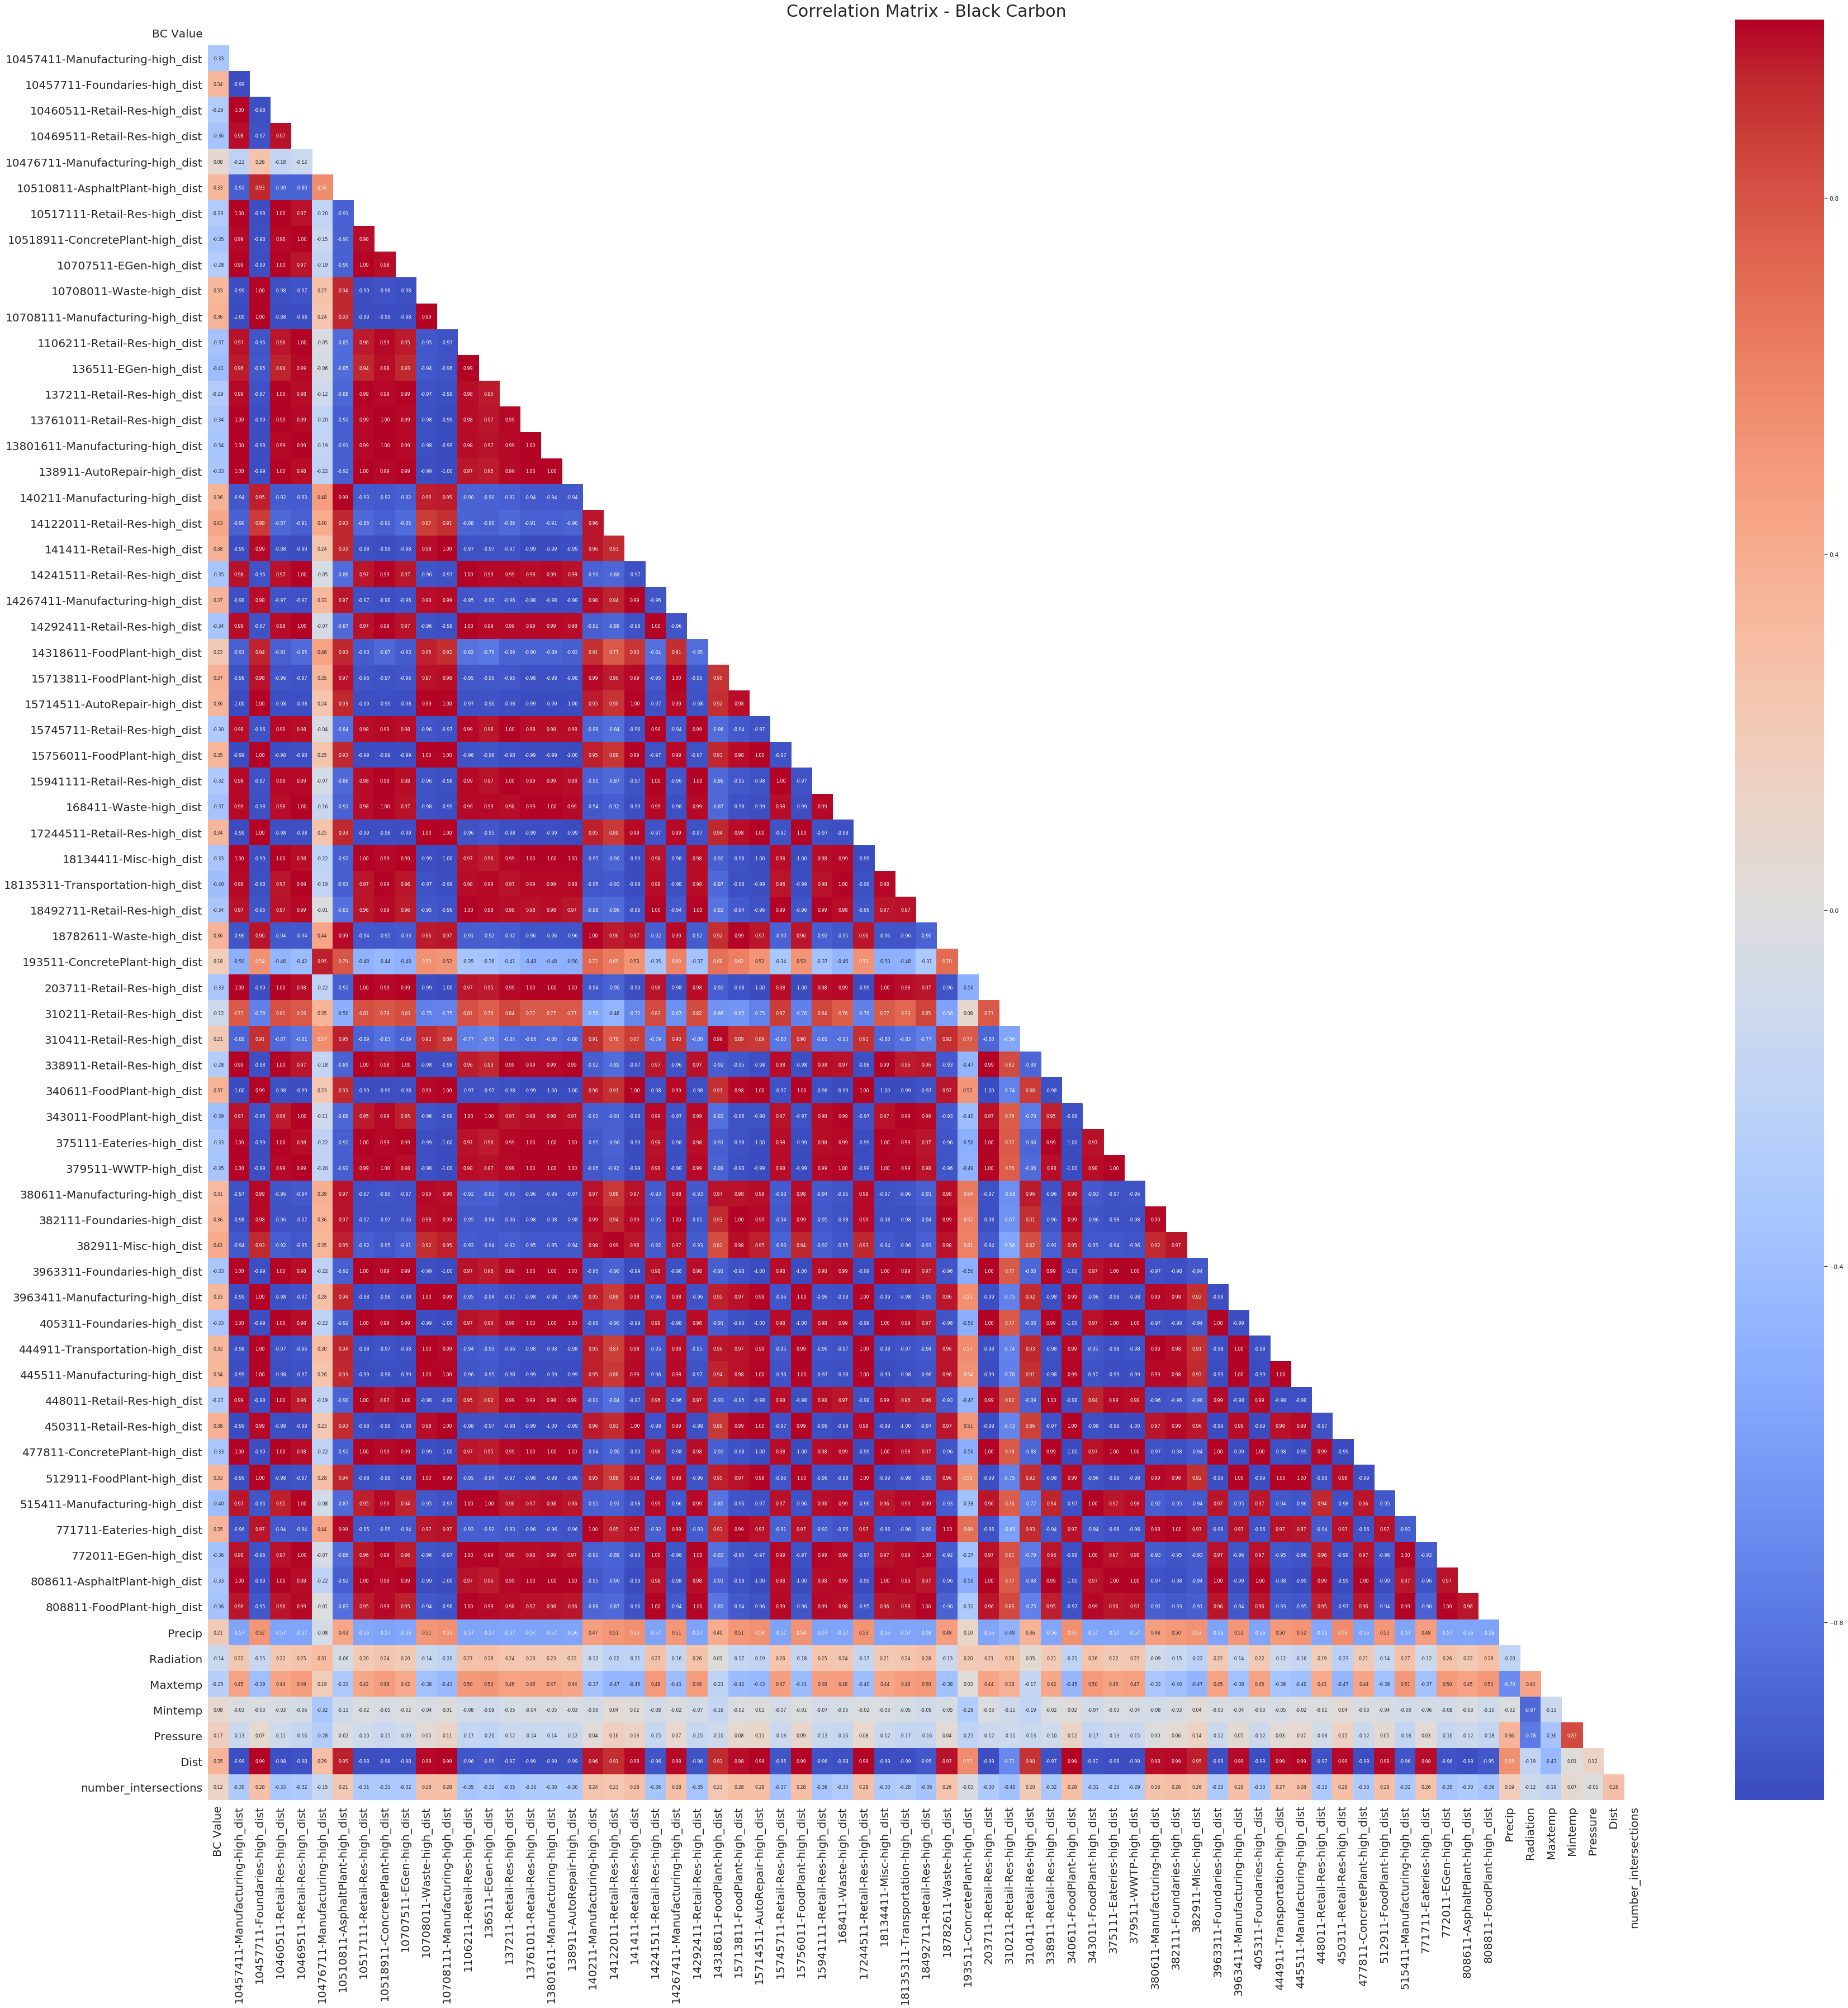

In [51]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_BC[np.triu_indices_from(arr_corr_BC)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_BC, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_BC.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_BC.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_BC.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

module://ipykernel.pylab.backend_inline


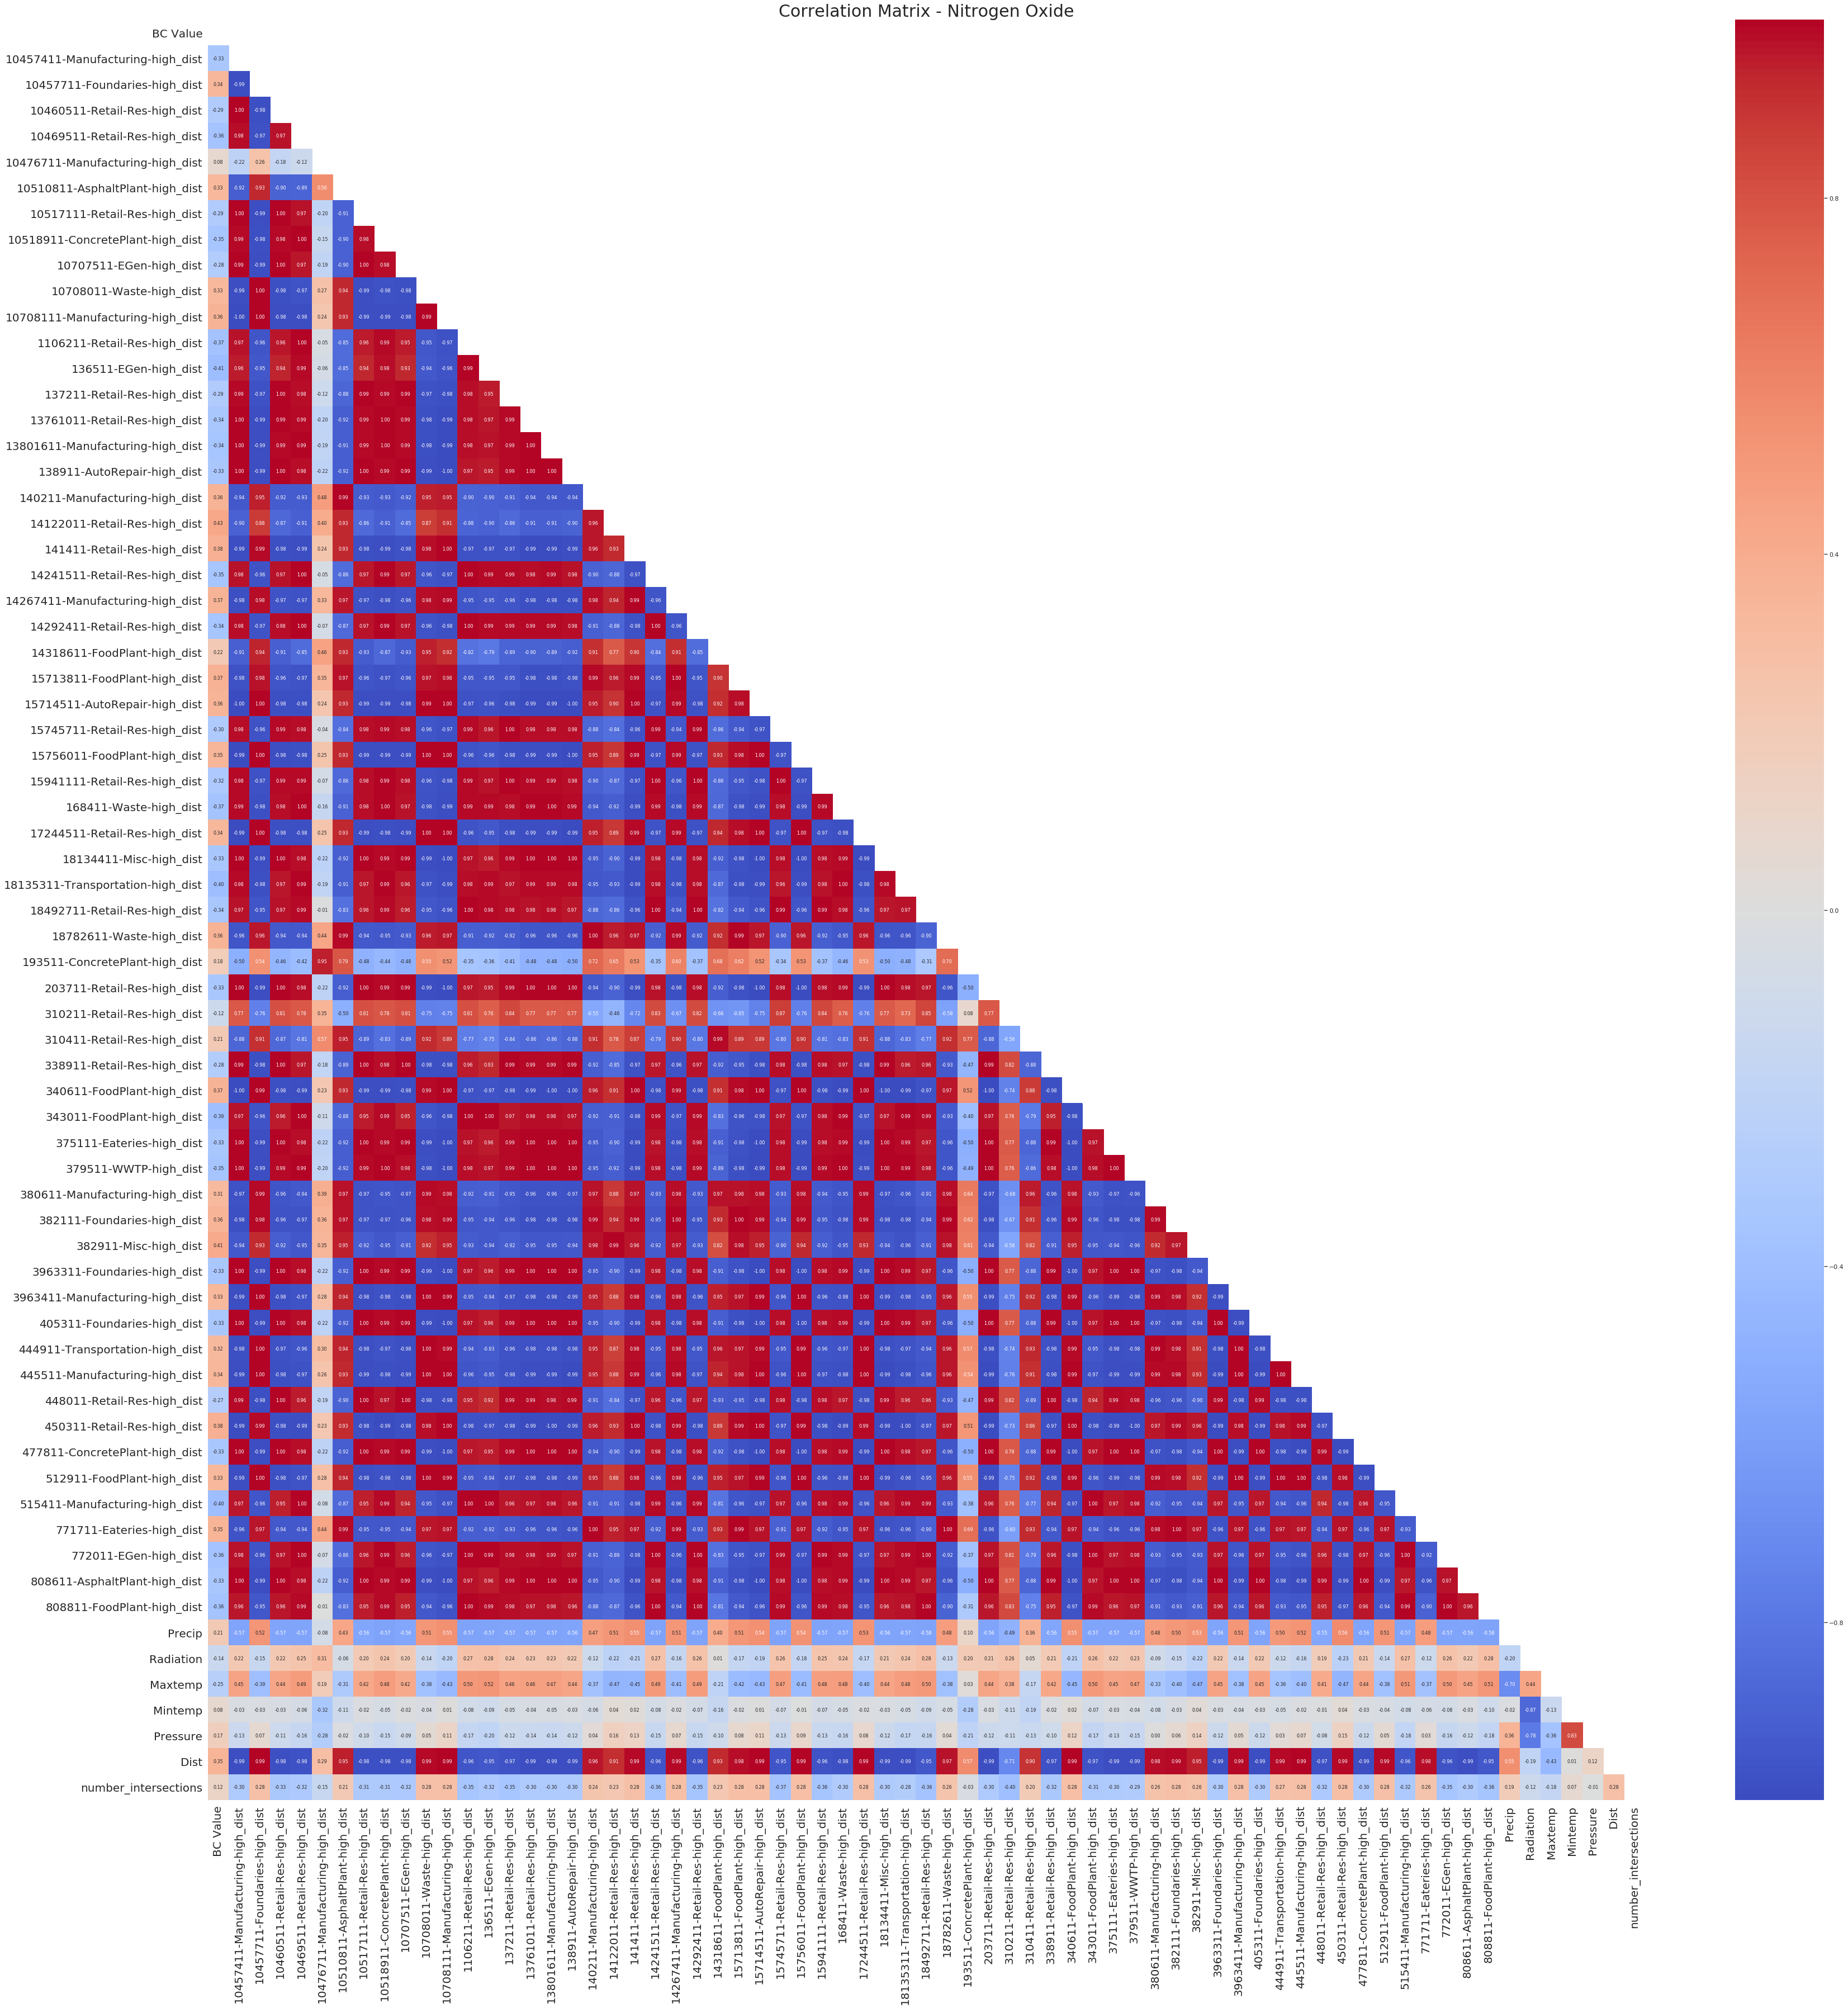

In [52]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_NO2[np.triu_indices_from(arr_corr_NO2)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_NO2, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_NO2.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_NO2.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_NO2.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Oxide', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<b> <font size = 5> Test 3: Correlation coefficient and Testing the Significance of the Correlation Coefficient </b> </font>

We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the data is strong enough to use to model the relationship. Since we have data for the entire population, we can use the population correlation coefficient. 

Null Hypothesis: H$_{0}$: ρ = 0

Alternate Hypothesis: H$_1$: ρ ≠ 0


ρ = population correlation coefficient

Null Hypothesis H$_0$: The population correlation coefficient <b>is not</b> significantly different from zero. There <b>is not</b> a significant linear relationship(correlation) between x and y in the population.

Alternate Hypothesis H$_1$: The population correlation coefficient is significantly different from zero. There <b>is a significant linear relationship</b> (correlation) between x and y in the population.


In [54]:
import pingouin as pg
BC_pearsonr = pg.pairwise_corr(BC_clustered, method='pearson')

In [59]:
BC_pearsonr.head(100)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,BC Value,10457411-Manufacturing-high_dist,pearson,two-sided,13379,-0.330193,"[-0.35, -0.32]",0.109027,0.108894,-0.343045,0.000000e+00,inf,1.0
1,BC Value,10457711-Foundaries-high_dist,pearson,two-sided,13379,0.336358,"[0.32, 0.35]",0.113136,0.113004,0.349980,0.000000e+00,inf,1.0
2,BC Value,10460511-Retail-Res-high_dist,pearson,two-sided,13379,-0.292290,"[-0.31, -0.28]",0.085433,0.085297,-0.301068,9.144344e-262,2.556e+257,1.0
3,BC Value,10469511-Retail-Res-high_dist,pearson,two-sided,13379,-0.364821,"[-0.38, -0.35]",0.133094,0.132965,-0.382436,0.000000e+00,inf,1.0
4,BC Value,10476711-Manufacturing-high_dist,pearson,two-sided,13379,0.077335,"[0.06, 0.09]",0.005981,0.005832,0.077490,3.313170e-19,2.865e+15,1.0
5,BC Value,10510811-AsphaltPlant-high_dist,pearson,two-sided,13379,0.334598,"[0.32, 0.35]",0.111956,0.111823,0.347997,0.000000e+00,inf,1.0
6,BC Value,10517111-Retail-Res-high_dist,pearson,two-sided,13379,-0.293197,"[-0.31, -0.28]",0.085965,0.085828,-0.302061,1.871776e-263,1.244e+259,1.0
7,BC Value,10518911-ConcretePlant-high_dist,pearson,two-sided,13379,-0.347513,"[-0.36, -0.33]",0.120765,0.120634,-0.362612,0.000000e+00,inf,1.0
8,BC Value,10707511-EGen-high_dist,pearson,two-sided,13379,-0.283185,"[-0.3, -0.27]",0.080194,0.080056,-0.291142,3.708037e-245,6.542e+240,1.0
9,BC Value,10708011-Waste-high_dist,pearson,two-sided,13379,0.329491,"[0.31, 0.34]",0.108564,0.108431,0.342257,0.000000e+00,inf,1.0


In [60]:
#### Estimating the Correlation Coefficient (r), 95% Confidence Interval for r,  R2 and p-value 

In [61]:
BC_pearsonr_BC = BC_pearsonr[BC_pearsonr.X == 'BC Value']

In [62]:
BC_pearsonr_BC.head(100)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,BC Value,10457411-Manufacturing-high_dist,pearson,two-sided,13379,-0.330193,"[-0.35, -0.32]",0.109027,0.108894,-0.343045,0.000000e+00,inf,1.0
1,BC Value,10457711-Foundaries-high_dist,pearson,two-sided,13379,0.336358,"[0.32, 0.35]",0.113136,0.113004,0.349980,0.000000e+00,inf,1.0
2,BC Value,10460511-Retail-Res-high_dist,pearson,two-sided,13379,-0.292290,"[-0.31, -0.28]",0.085433,0.085297,-0.301068,9.144344e-262,2.556e+257,1.0
3,BC Value,10469511-Retail-Res-high_dist,pearson,two-sided,13379,-0.364821,"[-0.38, -0.35]",0.133094,0.132965,-0.382436,0.000000e+00,inf,1.0
4,BC Value,10476711-Manufacturing-high_dist,pearson,two-sided,13379,0.077335,"[0.06, 0.09]",0.005981,0.005832,0.077490,3.313170e-19,2.865e+15,1.0
5,BC Value,10510811-AsphaltPlant-high_dist,pearson,two-sided,13379,0.334598,"[0.32, 0.35]",0.111956,0.111823,0.347997,0.000000e+00,inf,1.0
6,BC Value,10517111-Retail-Res-high_dist,pearson,two-sided,13379,-0.293197,"[-0.31, -0.28]",0.085965,0.085828,-0.302061,1.871776e-263,1.244e+259,1.0
7,BC Value,10518911-ConcretePlant-high_dist,pearson,two-sided,13379,-0.347513,"[-0.36, -0.33]",0.120765,0.120634,-0.362612,0.000000e+00,inf,1.0
8,BC Value,10707511-EGen-high_dist,pearson,two-sided,13379,-0.283185,"[-0.3, -0.27]",0.080194,0.080056,-0.291142,3.708037e-245,6.542e+240,1.0
9,BC Value,10708011-Waste-high_dist,pearson,two-sided,13379,0.329491,"[0.31, 0.34]",0.108564,0.108431,0.342257,0.000000e+00,inf,1.0


In [63]:
## Determine the p-value that is above the level of signifiance alpha of 0.05

In [64]:
BC_pearsonr[BC_pearsonr['p-unc'] >= 0.005 ]

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
358,10476711-Manufacturing-high_dist,18492711-Retail-Res-high_dist,pearson,two-sided,13379,-0.008296,"[-0.03, 0.01]",0.000069,-0.000081,-0.008296,0.337317,0.017,0.160295
385,10476711-Manufacturing-high_dist,808811-FoodPlant-high_dist,pearson,two-sided,13379,-0.006018,"[-0.02, 0.01]",0.000036,-0.000113,-0.006018,0.486417,0.014,0.107079
452,10510811-AsphaltPlant-high_dist,Pressure,pearson,two-sided,13379,-0.016004,"[-0.03, 0.0]",0.000256,0.000107,-0.016006,0.064151,0.06,0.456762
512,10517111-Retail-Res-high_dist,Mintemp,pearson,two-sided,13379,-0.017454,"[-0.03, -0.0]",0.000305,0.000155,-0.017456,0.043503,0.083,0.523544
631,10707511-EGen-high_dist,Mintemp,pearson,two-sided,13379,-0.015058,"[-0.03, 0.0]",0.000227,0.000077,-0.015059,0.081562,0.049,0.413738
746,10708111-Manufacturing-high_dist,Mintemp,pearson,two-sided,13379,0.010216,"[-0.01, 0.03]",0.000104,-0.000045,0.010216,0.237389,0.022,0.219006
1214,141411-Retail-Res-high_dist,Mintemp,pearson,two-sided,13379,0.022954,"[0.01, 0.04]",0.000527,0.000377,0.022958,0.007927,0.368,0.756584
1307,14267411-Manufacturing-high_dist,Mintemp,pearson,two-sided,13379,-0.020142,"[-0.04, -0.0]",0.000406,0.000256,-0.020145,0.019816,0.163,0.644300
1394,14318611-FoodPlant-high_dist,Radiation,pearson,two-sided,13379,0.011986,"[-0.0, 0.03]",0.000144,-0.000006,0.011987,0.165652,0.028,0.283521
1439,15713811-FoodPlant-high_dist,Mintemp,pearson,two-sided,13379,-0.015910,"[-0.03, 0.0]",0.000253,0.000104,-0.015911,0.065742,0.059,0.452424


The above cell indicates that only '10466511-FoodPlant-high_dist' has a p-value that is larger than the significance level α, thus we fail to reject the null hypothesis. Thus, we conclude that there is not enough evidence at the  α level to conclude that there is a linear relationship in the population between the BC value and response '10466511-FoodPlant-high_dist'.

In [ ]:
BC_pearsonr.describe()

In [ ]:
Potential questions: 
    
    1) What is the probability of observing a concentration that is higher than the ambient standards for Black Carbon and NO2? 

In [ ]:
 - Linear regression for stats
    - VIF scores - gives a score between all feeatures/predictor variables
    - Then do a linear regression 
    - Combine two facilities that are close to each other with similar VIF scores and take average distance
    - 
    

#### References
##### https://etav.github.io/python/vif_factor_python.html

### Dropping columns that have a correlation above 0.9

columns = np.full((corr_BC.shape[0],), True, dtype=bool)
for i in range(corr_BC.shape[0]):
    for j in range(i+1, corr_BC.shape[0]):
        if corr_BC.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = BC.columns[columns]
#data = data[selected_columns]

<b> T-test to determine whether is a significant difference between the means of two groups.</b>

1) Is there a significant difference in BC concentration for distance to highways > 4 km and less than 4 km?
1) Is there a significant difference in NO2 concentration for distance to highways > 4 km and less than 4 km?